# Biased Sampling
---

This demo looks at a hypothetical situation that illustrates what happens when we sample from a population in a biased manner. In effect, we are sampling from a population that is different from the population in which we are interested.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The synthesised data are the body weights of UM students who either go to the gym or do not go to the gym. Below, a dataframe is created with a row for each subject, and two columns - one column for the body weight and one column containing an indicator for whether a person goes to the gym.

In [ ]:
# parameters to re-create simukations
mean_nogym = 155
sd_nogym = 5
mean_gym = 185
sd_gym = 5
gym_percent = 0.3
population_size = 40000

# creating the subpopulations
nogym = np.random.normal(mean_nogym, sd_nogym, int(population_size * (1 - gym_percent)))
gym = np.random.normal(mean_gym, sd_gym, int(population_size * (gym_percent)))

# creating the total population from subpopulations
all_students = np.concatenate((nogym, gym))
gym_01 = np.concatenate((np.zeros(len(nogym)), np.ones(len(gym))))
df = pd.DataFrame({"weight": all_students, "gym": gym_01})

Let's first consider the students who do not go to the gym. This subpopulation appears as follows:

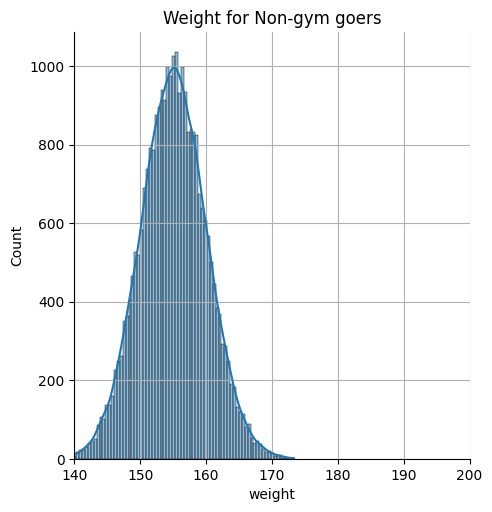

In [ ]:
sns.displot(df[df["gym"] == 0], x = "weight", kde = True)
plt.title("Weight for Non-gym goers")
plt.grid(True)
plt.xlim([140, 200]);

Next, considering the people who go to the gym, we have the following:

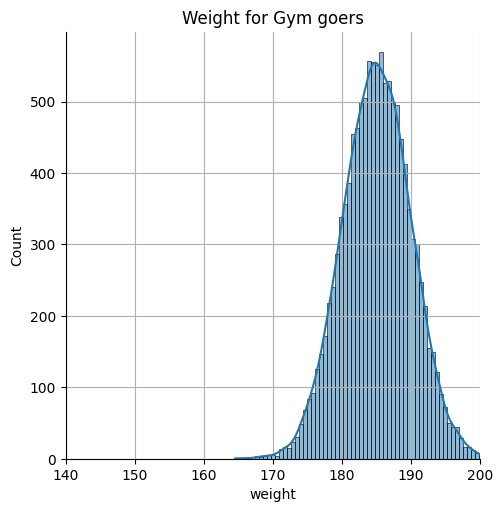

In [ ]:
sns.displot(df[df['gym'] == 1], x = 'weight', kde = True)
plt.title("Weight for Gym goers")
plt.grid(True)
plt.xlim([140, 200]);

The overall population is shown below. Since we have the entire population in-hand, the mean that we calculate here (shown as red vertical line) is the population mean:

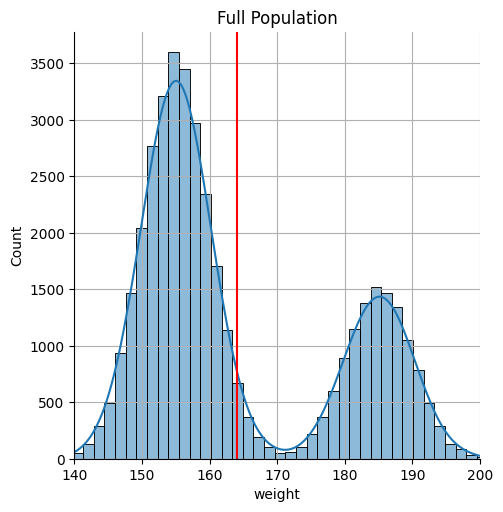

In [ ]:
sns.displot(df, x = 'weight', kde = True)
plt.title("Full Population")
plt.axvline(x = np.mean(df['weight']), color = 'red')
plt.grid(True)
plt.xlim([140, 200]);

## What happens if the entire population is sampled?

Here, we sample randomly from all students at the University of Michigan. Each sample is a small simple random sample from the total population. The sample mean is calculated of each sample for further investigation below.

In [ ]:
# simulation parameters
numberSamples = 5000
sampSize = 50

# get the sampling distribution of the mean from only the gym
mean_distribution = np.empty(numberSamples)

for i in range(numberSamples):
  student_sample = np.random.choice(df['weight'], sampSize)
  mean_distribution[i] = np.mean(student_sample)

Below, the distribution of sample means is plotted. As expected, the distribution of sample means appears somewhat normal, and is much more concentrated than the distribution of the data shown above.

The larger the sample size, the more concentrated this 'sampling distribution' will be. Moreover, we see that the sampling distribution is centered around the population mean.

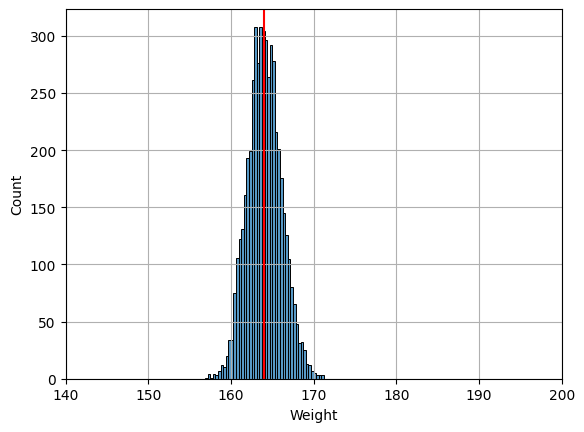

In [ ]:
sns.histplot(mean_distribution)
plt.axvline(x = np.mean(df['weight']), color = 'red')
plt.grid(True)
plt.xlabel("Weight")
plt.xlim([140, 200]);

## What happens if a non-representative sample is taken?

In [ ]:
# simulation parameters
numberSamples = 5000
sampSize = 50

# getting the sampling distribution of the mean from only the gym
biased_mean_distribution = np.empty(numberSamples)
biased_df = df[df['gym'] == 1]

for i in range(numberSamples):
  student_sample = np.random.choice(biased_df['weight'], sampSize)
  biased_mean_distribution[i] = np.mean(student_sample)

The distribution of these sample means is concentrated around the mean of gym-goers (blue line), but is strongly biased relative to the mean of the population (red line).

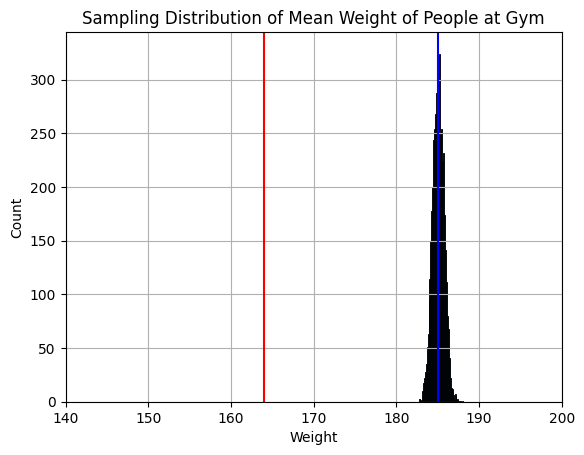

In [ ]:
sns.histplot(biased_mean_distribution)
plt.title("Sampling Distribution of Mean Weight of People at Gym")
plt.axvline(x = np.mean(df['weight']), color = 'red')
plt.axvline(x = np.mean(biased_df['weight']), color = 'blue')
plt.grid(True)
plt.xlabel("Weight")
plt.xlim([140, 200]);

# Notes

* While sampling, it's crucial to ensure that the samples collected are representative of the target population and do not contain any inherent bias.

* A non-representative sample causes the sampling distribution to deviate from the true population mean. As a result, the conclusions drawn from these estimates are inaccurate.